# **Modelling and Evaluation Notebook**

## Objectives

*   Answer business requirement 2: 
    * The client is interested to tell whether a given leaf has powdery mildew or not.
    
## Inputs

* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/test
* inputs/mildew_dataset/cherry-leaves/validation
* image shape embeddings.

## Outputs
* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Saved model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.


## Comments | Insights | Conclusions

* Image distribution plots are presented and bar and pie chart formats.
* Image augmentation applied to the dataset to accommodate different variations unseen data could be.
* CNN model was built with optimal balance between complexity and performance.
* The final, best, model is saved. Details of the hyperparameters, validation and general performance are outlined in the ReadMe.
* Model was tested on a random, unseen image and it predicted the results accurately.


---

# Set working directory

In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))
current_dir = os.getcwd()
current_dir

'/workspaces/detect-mild-dew-in-cherry-leaves'

### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Set input directories

Set `test`, `train` and `validation` paths as variables

In [4]:
data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = f'{data_dir}/train'
valid_path = f'{data_dir}/validation'
test_path = f'{data_dir}/test'

### Set output directory

In [5]:
version = 'v3'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


### Set labels

In [6]:
labels = os.listdir(test_path)
labels.sort()
print("Lables are:", labels)

Lables are: ['healthy', 'powdery_mildew']


### Set Image shape

In [7]:
## Import saved image shape embedding
import joblib
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

---

# Data Frequencies

### Check frequency of images: train, test and validation

In [42]:
data_ls =[]
for set in os.listdir(data_dir):
    set_path = os.path.join(data_dir, set)
    for label in os.listdir(set_path):
        sub_path = os.path.join(set_path, label)
        count = len(os.listdir(sub_path))
        data_ls.append(
            {'Set': set,
             'Label': label,
             'Count': count})

df_counts = pd.DataFrame(data_ls)
print(df_counts)

          Set           Label  Count
0       train  powdery_mildew   1472
1       train         healthy   1472
2  validation  powdery_mildew    210
3  validation         healthy    210
4        test  powdery_mildew    422
5        test         healthy    422


**Bar char - data frequencies**

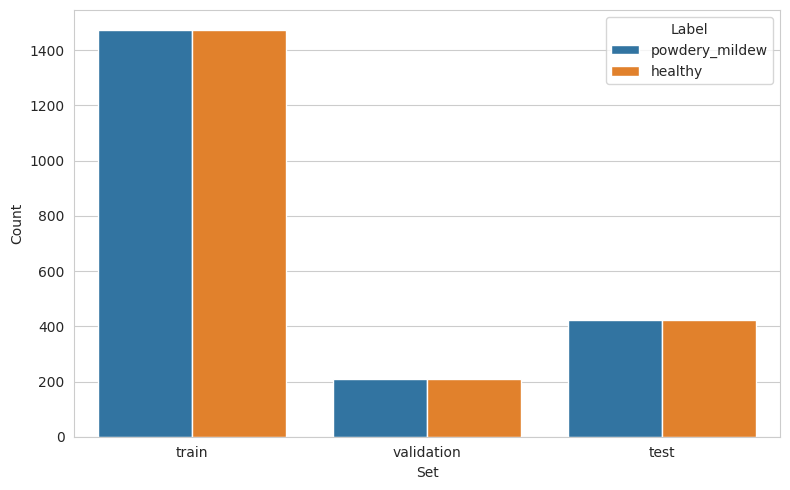

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_counts, x='Set', y='Count', hue='Label')
plt.tight_layout()
plt.savefig(f'{file_path}/bar_freq_label_distribution.png', dpi=150)
plt.show()

**Pie chart label distribution**

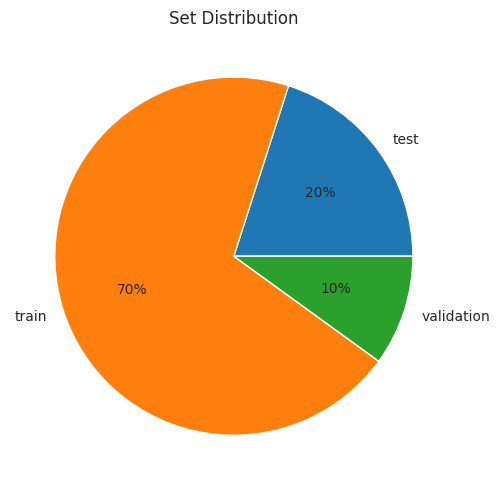

In [10]:
plt.figure(figsize=(8,5))
count_sum = df_counts.groupby('Set')['Count'].sum()

count_sum.plot.pie(autopct='%.0f%%')
plt.title('Set Distribution')
plt.ylabel('')
plt.tight_layout()
plt.savefig(f'{file_path}/pie_set_distribution.png', dpi=150)
plt.show()

---

# Image data augmentation

### Image data Generator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-11-13 03:13:17.687890: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-13 03:13:17.719396: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Initialize ImageDataGenerator**

In [43]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                        width_shift_range=0.10,
                                        height_shift_range=0.10,
                                        shear_range=0.1,
                                        zoom_range=0.1,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='nearest',
                                        rescale=1./255
                                        )


**Set batch size**

In [44]:
batch_size = 20

**Augment training image dataset**

In [45]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices


Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

**Augment Test image dataset**

In [46]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

**Augment Validation image dataset**

In [47]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(valid_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices


Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 120, 120, 3)


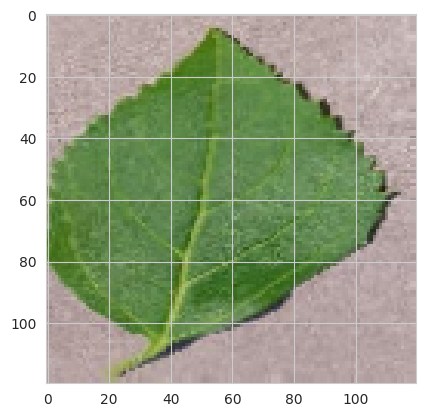

(20, 120, 120, 3)


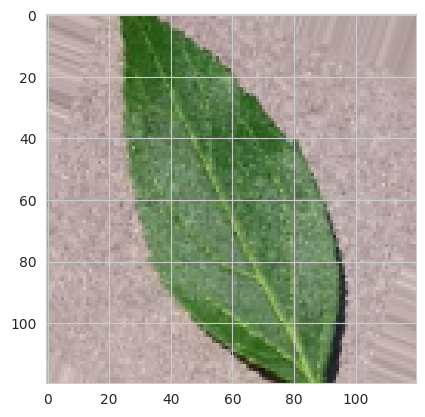

(20, 120, 120, 3)


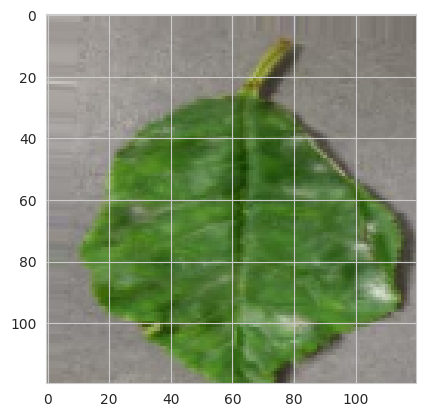

In [48]:
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation and test images

(20, 120, 120, 3)


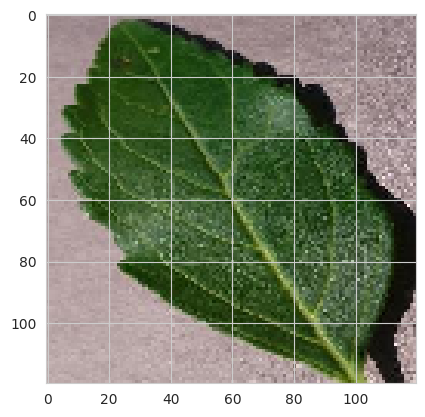

(20, 120, 120, 3)


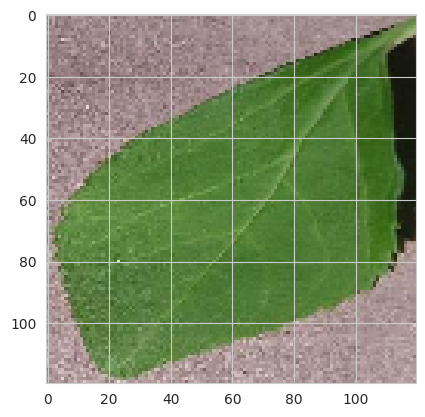

(20, 120, 120, 3)


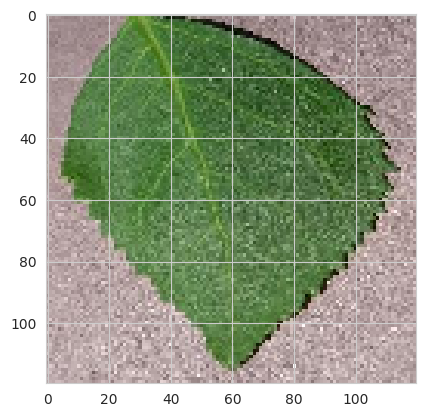

In [49]:
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

(20, 120, 120, 3)


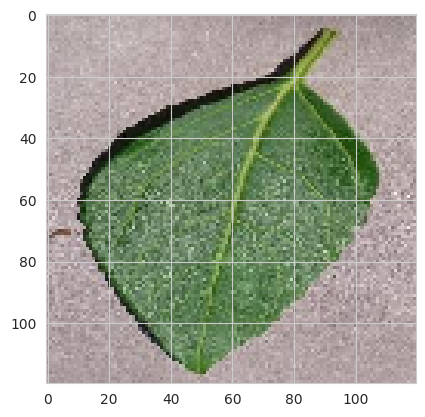

(20, 120, 120, 3)


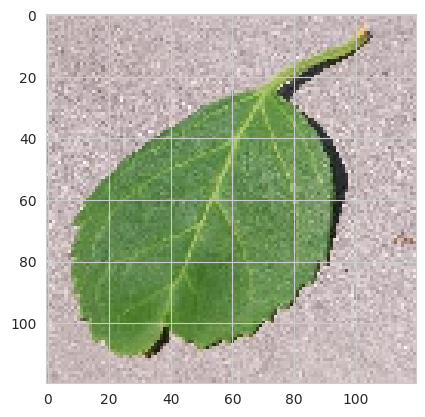

(20, 120, 120, 3)


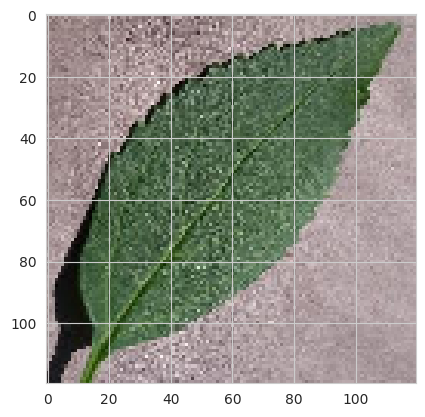

In [51]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()


## Save class_indices

In [52]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v3/class_indices.pkl']

---

# Model creation

---

## ML model

* **Import libraries**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

*  **Model**

In [55]:
def create_tf_model():
    model = Sequential()

    # input layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # convolutional layers
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # convolutional layers
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # fully connected layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layers
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer='adagrad',
                metrics=['accuracy'])

    return model


* ### Model Summary

In [56]:
create_tf_model().summary()

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 118, 118, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441,154 (5.50 MB)

 Trainable params: 1,441,154 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

* ### Early Stopping 

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


## Fit model for model training

In [58]:
model = create_tf_model()
model.fit(train_set,
          epochs=35,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 31s 203ms/step - accuracy: 0.6033 - loss: 0.6741 - val_accuracy: 0.5619 - val_loss: 0.6444
Epoch 2/35
  1/147 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.6500 - loss: 0.6118

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6500 - loss: 0.6118 - val_accuracy: 0.5214 - val_loss: 0.6445
Epoch 3/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 38s 193ms/step - accuracy: 0.7565 - loss: 0.6008 - val_accuracy: 0.8310 - val_loss: 0.5087
Epoch 4/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9500 - loss: 0.4335 - val_accuracy: 0.7452 - val_loss: 0.5171
Epoch 5/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 39s 190ms/step - accuracy: 0.8345 - loss: 0.4380 - val_accuracy: 0.8762 - val_loss: 0.3289
Epoch 6/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.2248 - val_accuracy: 0.8833 - val_loss: 0.3253
Epoch 7/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 27s 185ms/step - accuracy: 0.8608 - loss: 0.3321 - val_accuracy: 0.9024 - val_loss: 0.2716
Epoch 8/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8500 - loss: 0.3033 - val_accuracy: 0.8952 - val_loss: 0.2868
Epoch 9/35
147/147 ━━━━━━━━━━━━━━━━━━━━ 40s 185ms/step - accuracy: 0.8793 - loss: 0.2989 - val_accuracy: 0

---

# Model Performance

### Model Learning Curve

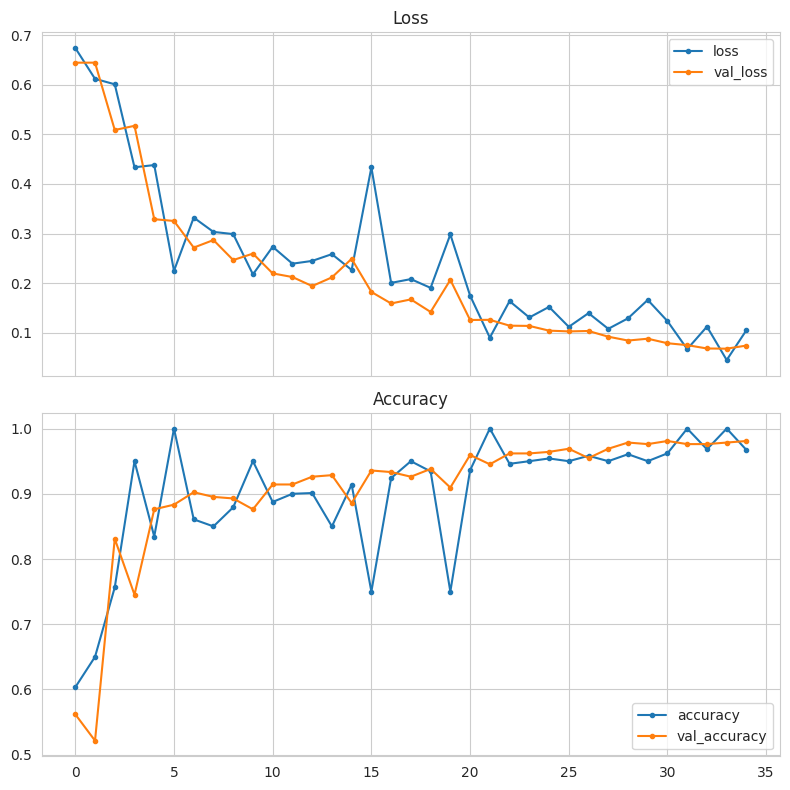

In [60]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Loss plot
axes[0].plot(losses['loss'], '.-', label='loss')
axes[0].plot(losses['val_loss'], '.-', label='val_loss')
axes[0].set_title("Loss")
axes[0].legend()

# Accuracy plot
axes[1].plot(losses['accuracy'], '.-', label='accuracy')
axes[1].plot(losses['val_accuracy'], '.-', label='val_accuracy')
axes[1].set_title("Accuracy")
axes[1].legend()

plt.tight_layout()
plt.savefig(f"{file_path}/model_training_loss_accuracy.png", dpi=150, bbox_inches='tight')
plt.show()

## Save model

In [61]:
model.save(f'outputs/{version}/powdery_mildew_detector_model.h5')

## Model Evaluation

Load saved model

In [ ]:
from keras.models import load_model
model = load_model(f'outputs/{version}/powdery_mildew_detector_model.h5')

**Evaluate using test set**

In [62]:
test_loss, test_acc = model.evaluate(test_set, verbose=1)
print(f"Model Accuracy: {test_acc:.4f}")
print(f"Model Loss: {test_loss:.4f}")

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9763 - loss: 0.0951
Model Accuracy: 0.9763
Model Loss: 0.0951


**Run test predictions:**

In [63]:
preds = np.argmax(model.predict(test_set), axis=1)
y_pred = np.rint(preds)
y_true = test_set.labels

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step


### Classification Report

                precision    recall  f1-score     support
healthy          0.956818  0.997630  0.976798  422.000000
powdery_mildew   0.997525  0.954976  0.975787  422.000000
accuracy         0.976303  0.976303  0.976303    0.976303
macro avg        0.977171  0.976303  0.976293  844.000000
weighted avg     0.977171  0.976303  0.976293  844.000000


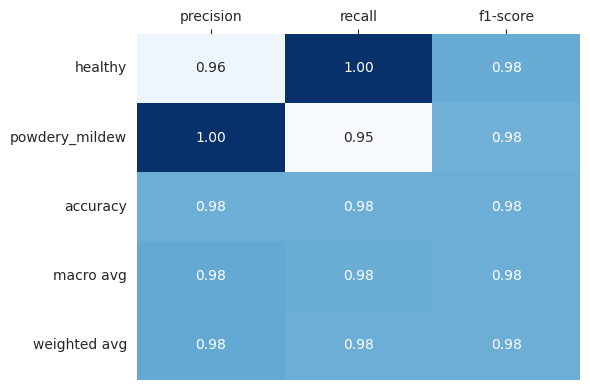

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_true, y_pred, target_names=test_set.class_indices.keys(), output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)
df_plot = df_report[['precision', 'recall', 'f1-score']]

plt.figure(figsize=(6,4))
ax=sns.heatmap(df_plot, annot=True, cmap='Blues', fmt=".2f", cbar=False)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.savefig(f'{file_path}/classification_report.png', bbox_inches='tight', dpi=150)
plt.show()

### Confusion Matrix

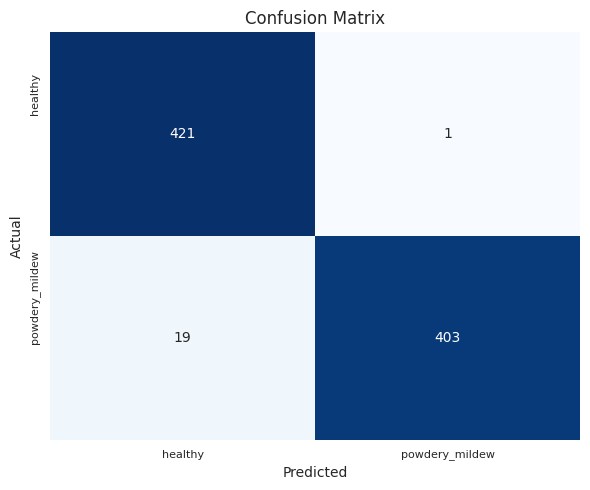

In [65]:
# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
classes=list(test_set.class_indices.keys()) 
length=len(classes)     
plt.xticks(np.arange(length)+.5, classes, rotation= 0, fontsize=8)
plt.yticks(np.arange(length)+.3, classes, rotation=90, fontsize=8)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(f'{file_path}/confusion_matrix.png', bbox_inches='tight', dpi=150)
plt.show()

### ROC Curve and AUC

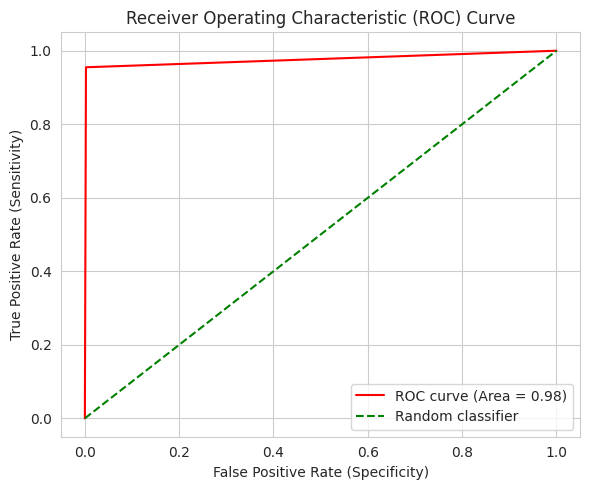

In [67]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

sns.set_style("whitegrid")
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (Area = {round(roc_auc,2)})", color='red')
plt.plot([0, 1], [0, 1], 'g--',label="Random classifier")
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig(f'{file_path}/roc_auc_curve.png', bbox_inches='tight', dpi=150)
plt.show()


### Save evaluation as pickle

In [68]:
joblib.dump(value=[test_loss, test_acc],
            filename=f"outputs/{version}/evaluation.pkl")

['outputs/v3/evaluation.pkl']

# Predict on unseen data

### Random image from Test

Label: healthy
Image shape: (120, 120), Image mode: RGB


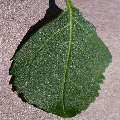

In [72]:
from tensorflow.keras.preprocessing import image

pointer = 41
label = labels[0]  # select 0 - 'healthy' or 1 - 'powdery_mildew'
print(f"Label: {label}")

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


Convert image to array and prepare for prediction

In [73]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 120, 120, 3)


Predict class and probabilities

In [74]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba < 0.5]

if pred_class == target_map[1]:
    pred_proba = 1 - pred_proba

print(f"{pred_class} {round(pred_proba*100, 2)}%")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
healthy 99.38%
